* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visualization for export/import by year](#21)
    * [2.2 Visualization for export/import by rank](#22)
    * [2.3 Visualization for export/import by commodity](#23)
    * [2.4 Visualization for export/import by HSCode](#24)
* [3.Conclusion](#3.Conclusion)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
import datetime

In [2]:
os.listdir("../input/india-trade-data")

['2018-2010_export.csv', '2018-2010_import.csv']

# 1.DataOverView

The data size is 122985 and 79068 for export and import respectively.The variables include HSCode,Commodity,value,country,and year.

According to the two data, we can find out which country is important to India for export and import.Moreover, we can find out which

value of commodity is increased or decreased by year.

In [3]:
data_export=pd.read_csv("../input/india-trade-data/2018-2010_export.csv")
data_import=pd.read_csv("../input/india-trade-data/2018-2010_import.csv")
data_export.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


## Missing value

There are 14038 and 14027 missing values for export and import data respectively. We drop them out direct.


In [4]:
data_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [5]:
data_export=data_export.dropna(subset=['value'])

In [6]:
data_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [7]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [8]:
data_import=data_import.dropna(subset=['value'])

# 2.Visualization

According to the two bar chart, we know that USA and China are the important country to India for export and import.

<h3 id="21">2.1 Visualization for export/import by year</h3>

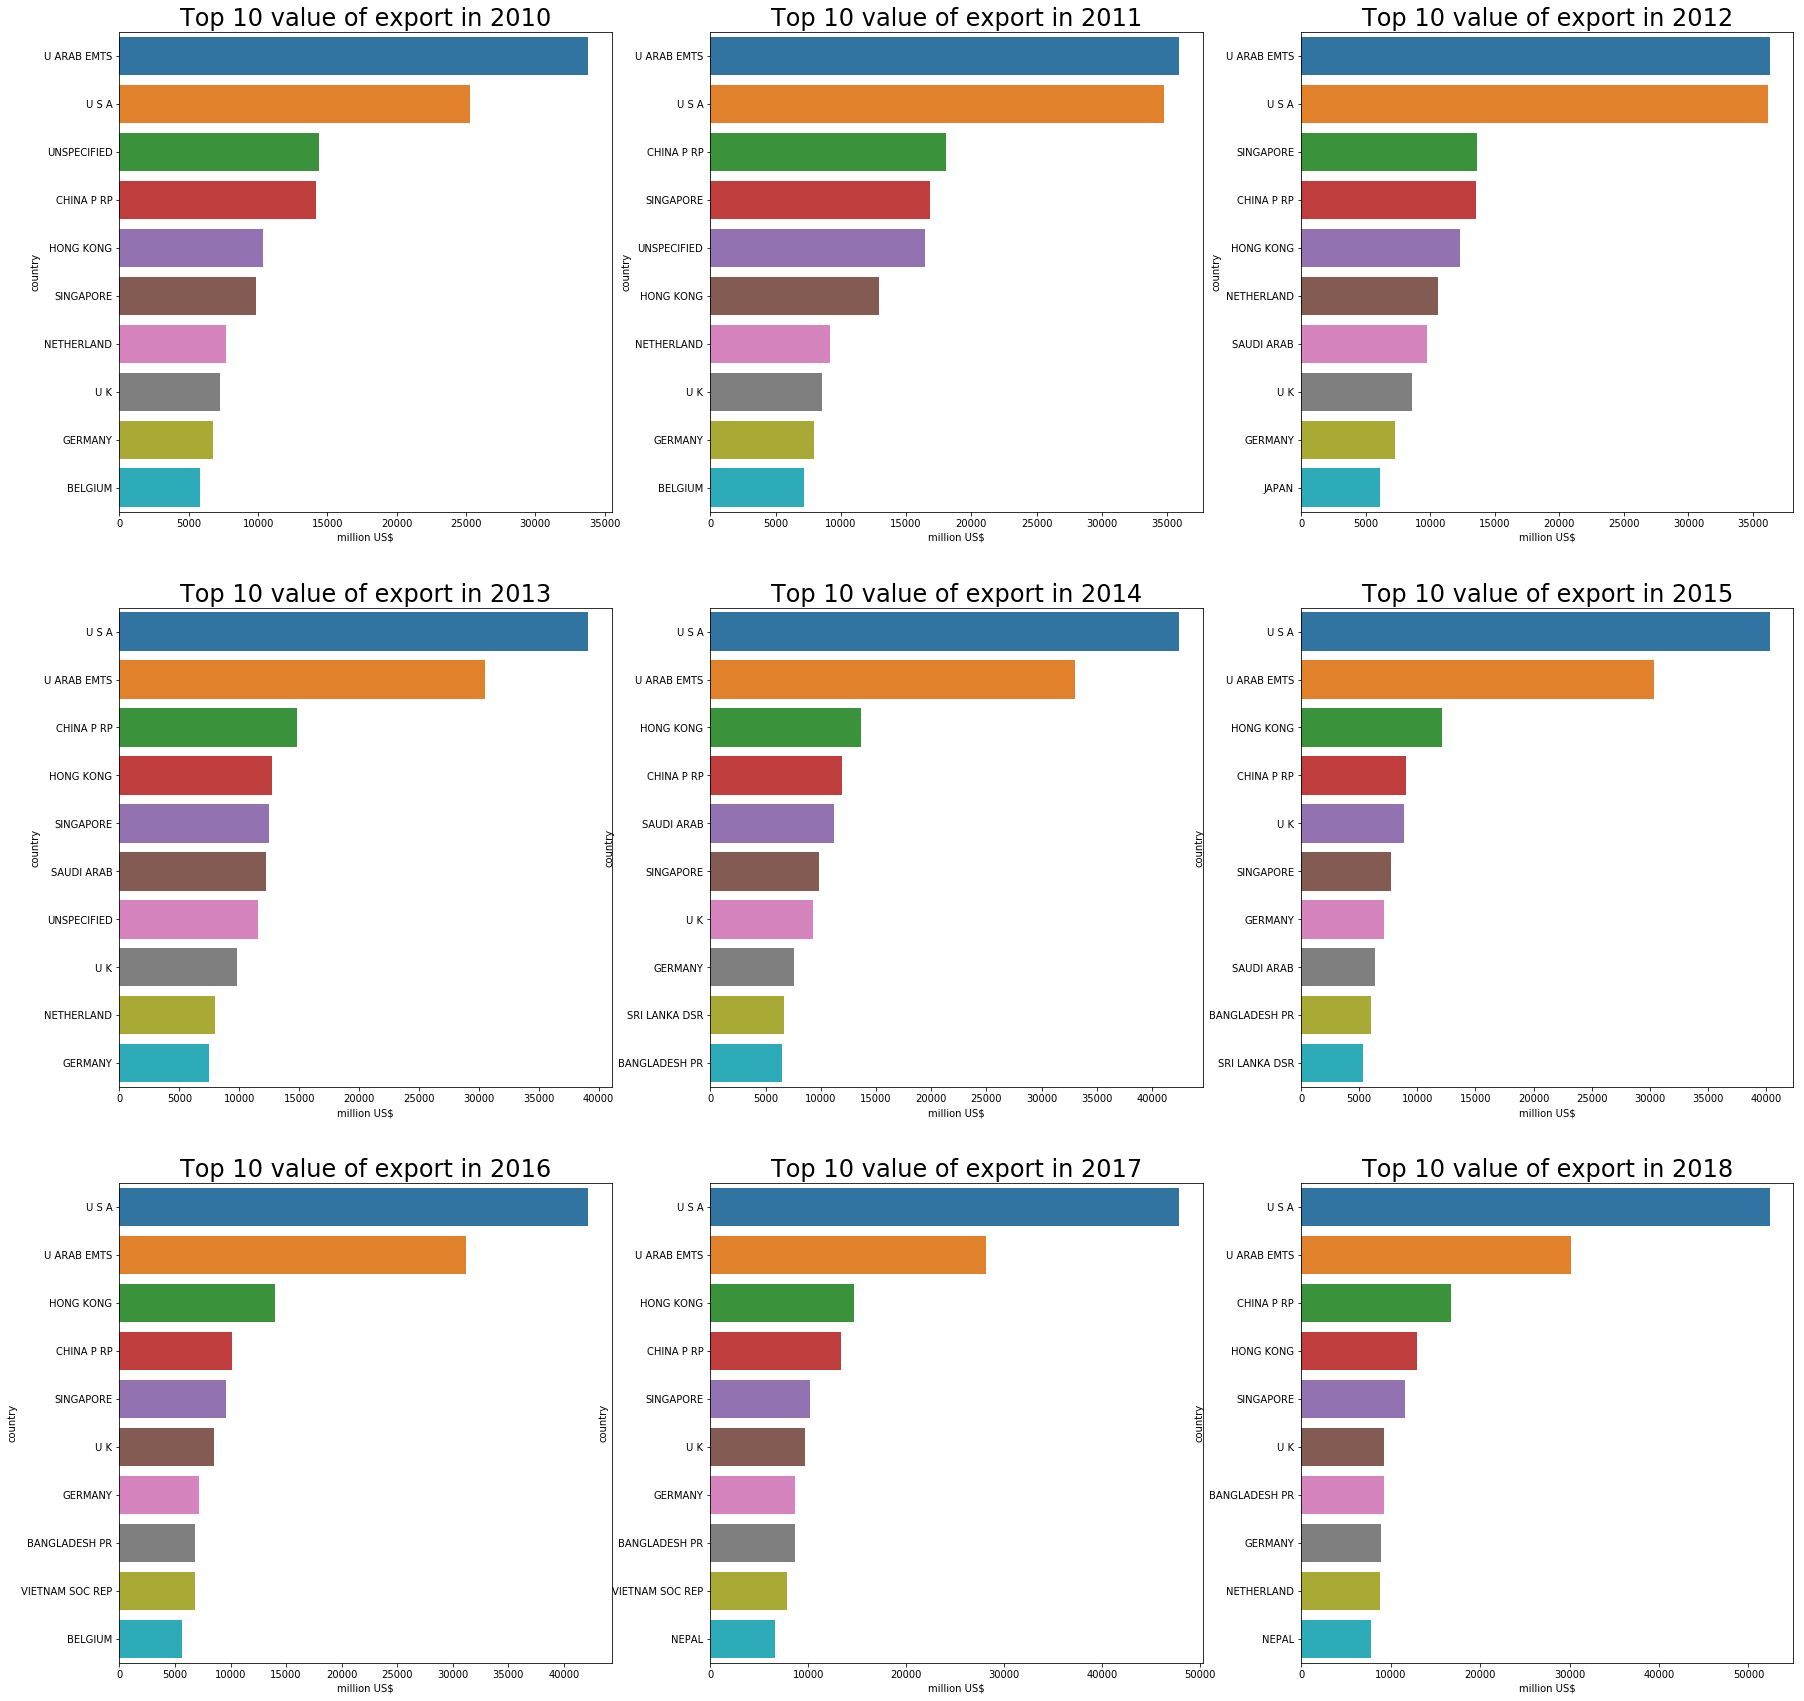

In [9]:
plt.figure(figsize=(30,30))
j=0
for i in ['2010','2011','2012','2013','2014','2015','2016','2017','2018']:
    j+=1
    plt.subplot(3,3,j)
    y=data_export[data_export.year==int(i)].groupby('country')['value'].agg('sum').sort_values(ascending=False)[:10].index
    x=data_export[data_export.year==int(i)].groupby('country')['value'].agg('sum').sort_values(ascending=False)[:10]
    sns.barplot(x=x,y=y)
    plt.title('Top 10 value of export in '+i,size=24)
    plt.xlabel('million US$')

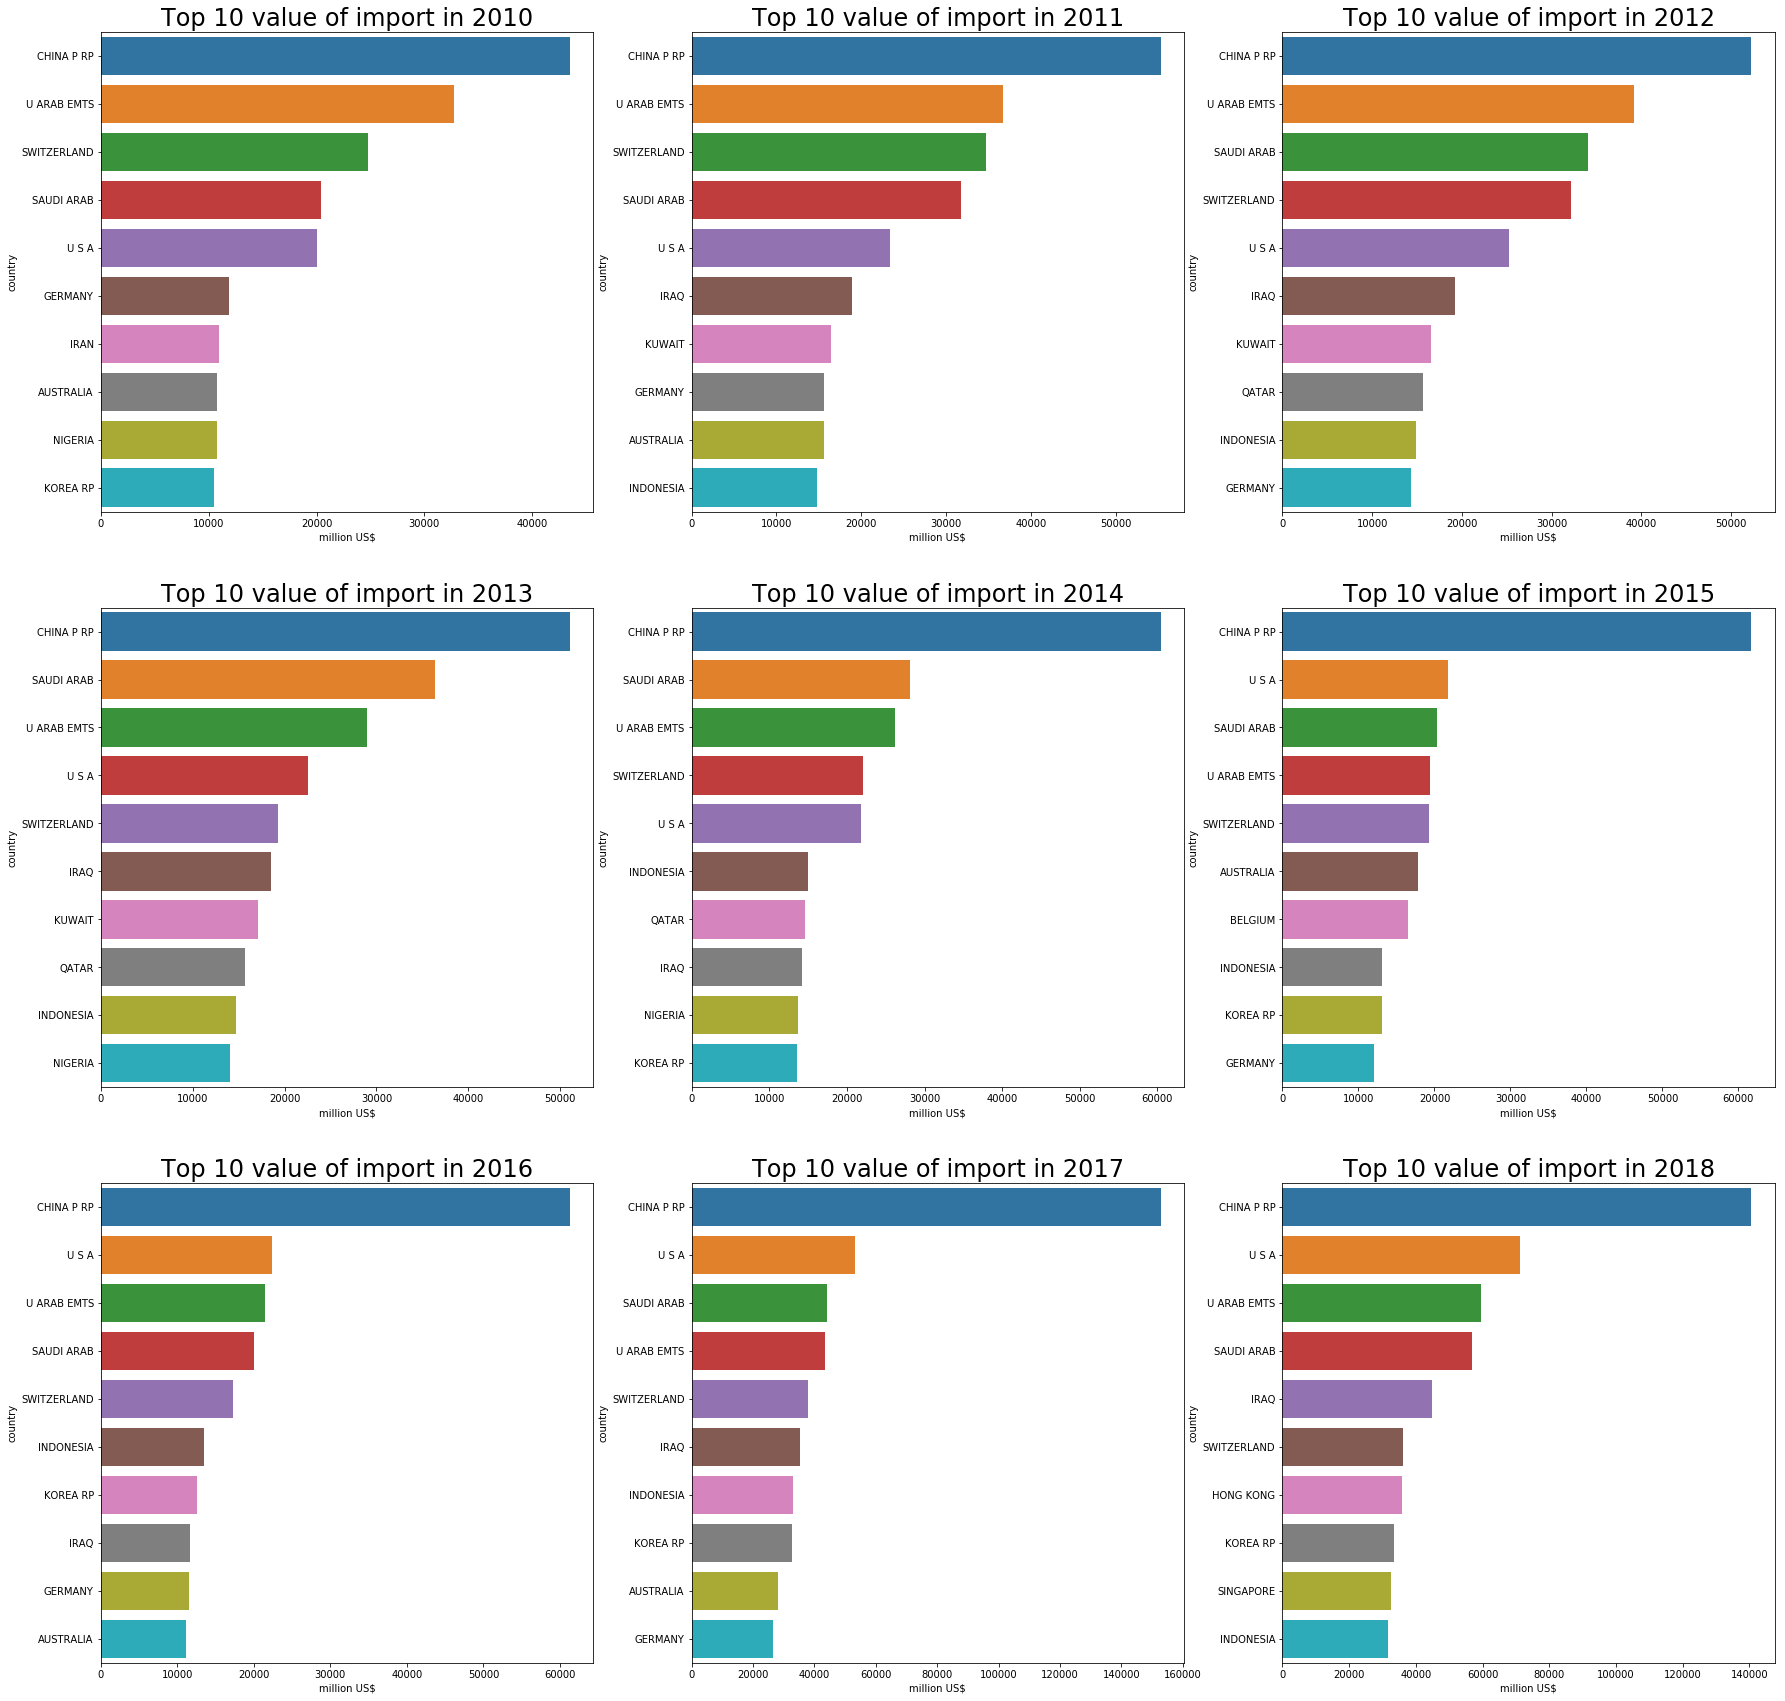

In [10]:
plt.figure(figsize=(30,30))
j=0
for i in ['2010','2011','2012','2013','2014','2015','2016','2017','2018']:
    j+=1
    plt.subplot(3,3,j)
    y=data_import[data_import.year==int(i)].groupby('country')['value'].agg('sum').sort_values(ascending=False)[:10].index
    x=data_import[data_import.year==int(i)].groupby('country')['value'].agg('sum').sort_values(ascending=False)[:10]
    sns.barplot(x=x,y=y)
    plt.title('Top 10 value of import in '+i,size=24)
    plt.xlabel('million US$')

<h3 id="22">2.2 Visualization for export/import by rank</h3>

I rank the country by the sum of value,to find out the important country to India for export and import by year easier.The country is more important to India if the area of the plot is more large.

In [11]:
def rank_export(country):
    year=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
    B={}
    for i in range(len(year)):
        A=data_export[data_export.year==int(year[i])]
        value=A.groupby(['country'])['value'].agg('sum')
        rank=A.groupby(['country'])['value'].agg('sum').rank(method='min',ascending=False)
        new=pd.DataFrame({'rank':rank,'value':value})
        B['rank '+year[i]]=str(new[new.index==country].iloc[0,0])+"/"+str(max(rank))
        B['value '+year[i]]=str(new[new.index==country].iloc[0,1])

    return B

In [12]:
def rank_import(country):
    year=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
    B={}
    for i in range(len(year)):
        A=data_import[data_import.year==int(year[i])]
        value=A.groupby(['country'])['value'].agg('sum')
        rank=A.groupby(['country'])['value'].agg('sum').rank(method='min',ascending=False)
        new=pd.DataFrame({'rank':rank,'value':value})
        B['rank '+year[i]]=str(new[new.index==country].iloc[0,0])+"/"+str(max(rank))
        B['value '+year[i]]=str(new[new.index==country].iloc[0,1])

    return B

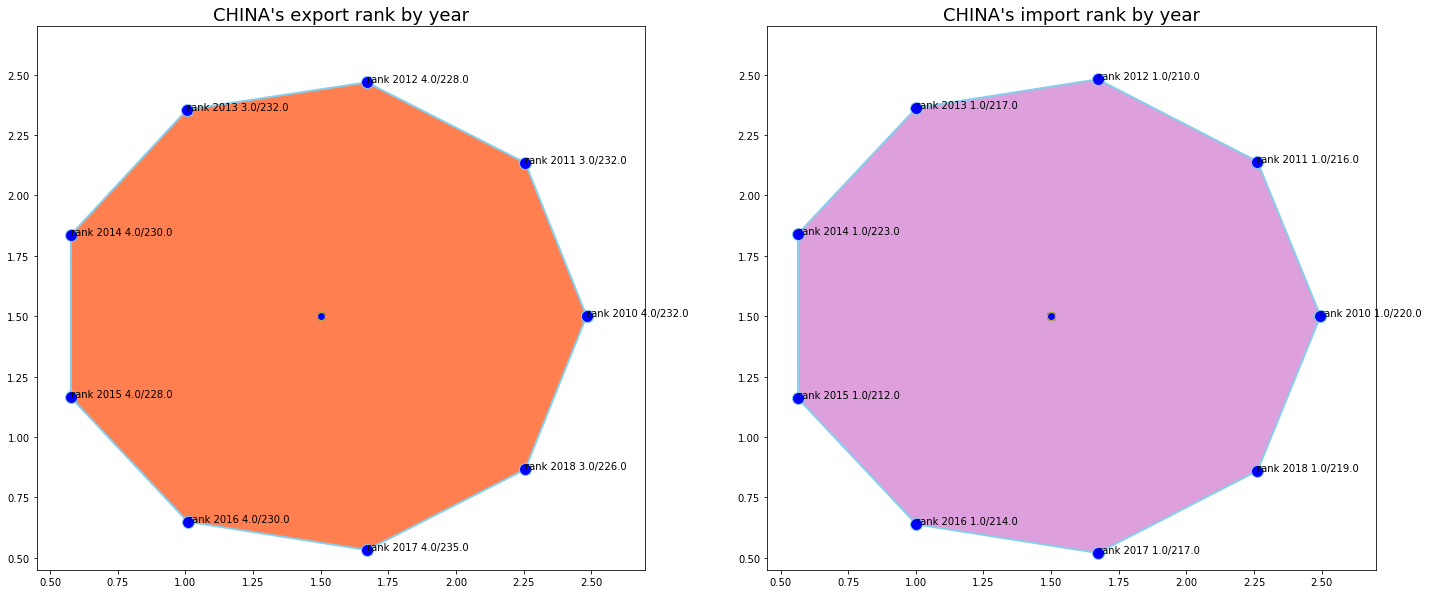

In [13]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
CHINA=rank_export('CHINA P RP')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=CHINA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+CHINA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.fill(x, y,"coral")
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("CHINA's export rank by year",size=18)
    
plt.subplot(1,2,2)
CHINA=rank_import('CHINA P RP')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=CHINA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+CHINA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.fill(x, y,"plum")
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("CHINA's import rank by year",size=18)   

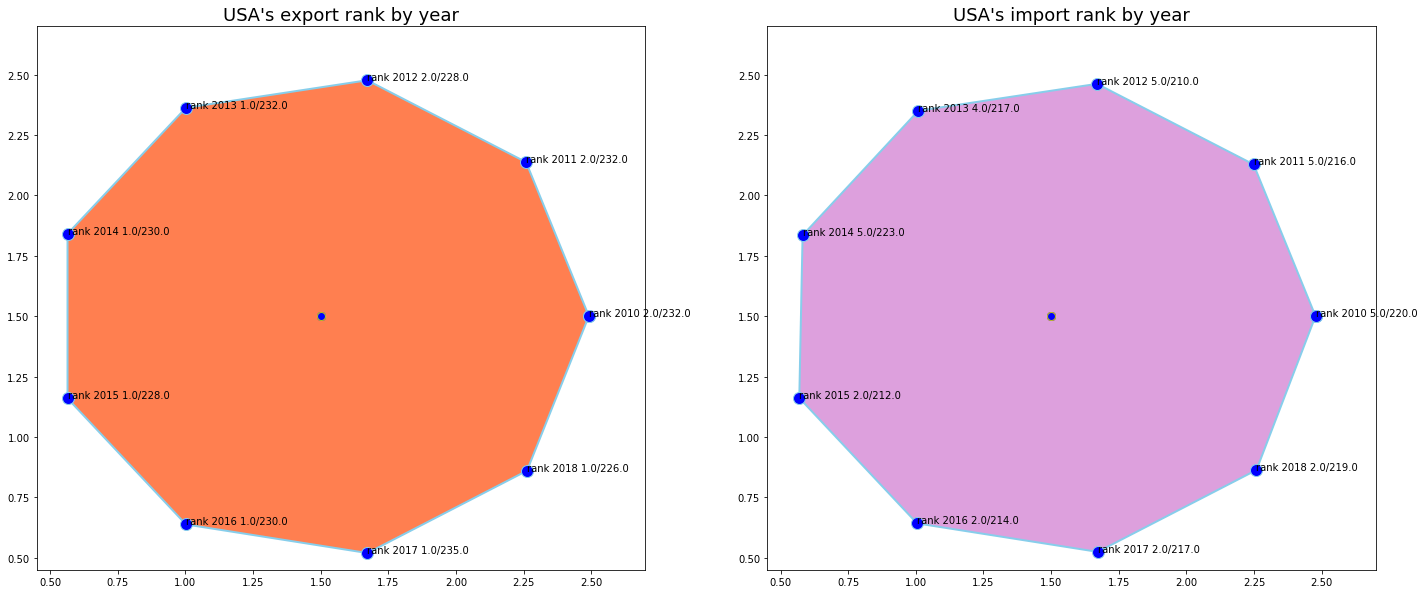

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
USA=rank_export('U S A')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=USA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+USA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.fill(x, y,"coral")
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("USA's export rank by year",size=18)
    
plt.subplot(1,2,2)
USA=rank_import('U S A')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=USA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+USA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.fill(x, y,"plum")
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("USA's import rank by year",size=18)    
    

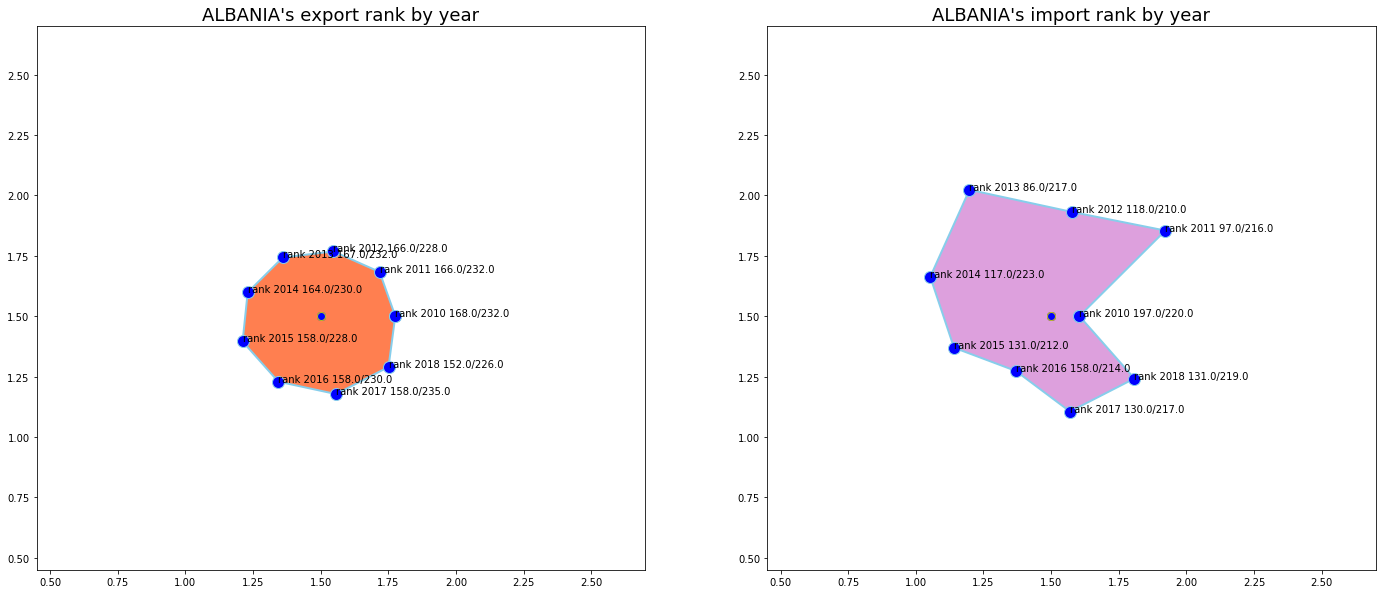

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
ALBANIA=rank_export('ALBANIA')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=ALBANIA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+ALBANIA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.fill(x, y,"coral")
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("ALBANIA's export rank by year",size=18)
    
plt.subplot(1,2,2)
ALBANIA=rank_import('ALBANIA')
y=[]
x=[]
n=[]
for i in range(9):
    r1,r2=ALBANIA['rank '+str(i+2010)].split('/')
    R=float(r1)/float(r2)
    R=1-R
    y.append(1.5+R*math.sin(0+i*2*math.pi/9))
    x.append(1.5+R*math.cos(0+i*2*math.pi/9))
    n.append('rank '+str(i+2010)+' '+ALBANIA['rank '+str(i+2010)])
    
x.append(x[0])
y.append(y[0])
plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    plt.xlim(0.45,2.7)
    plt.ylim(0.45,2.7)
    plt.fill(x, y,"plum")
    plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
    plt.title("ALBANIA's import rank by year",size=18)    

<h3 id="23">2.3 Visualization for export/import by commodity</h3>

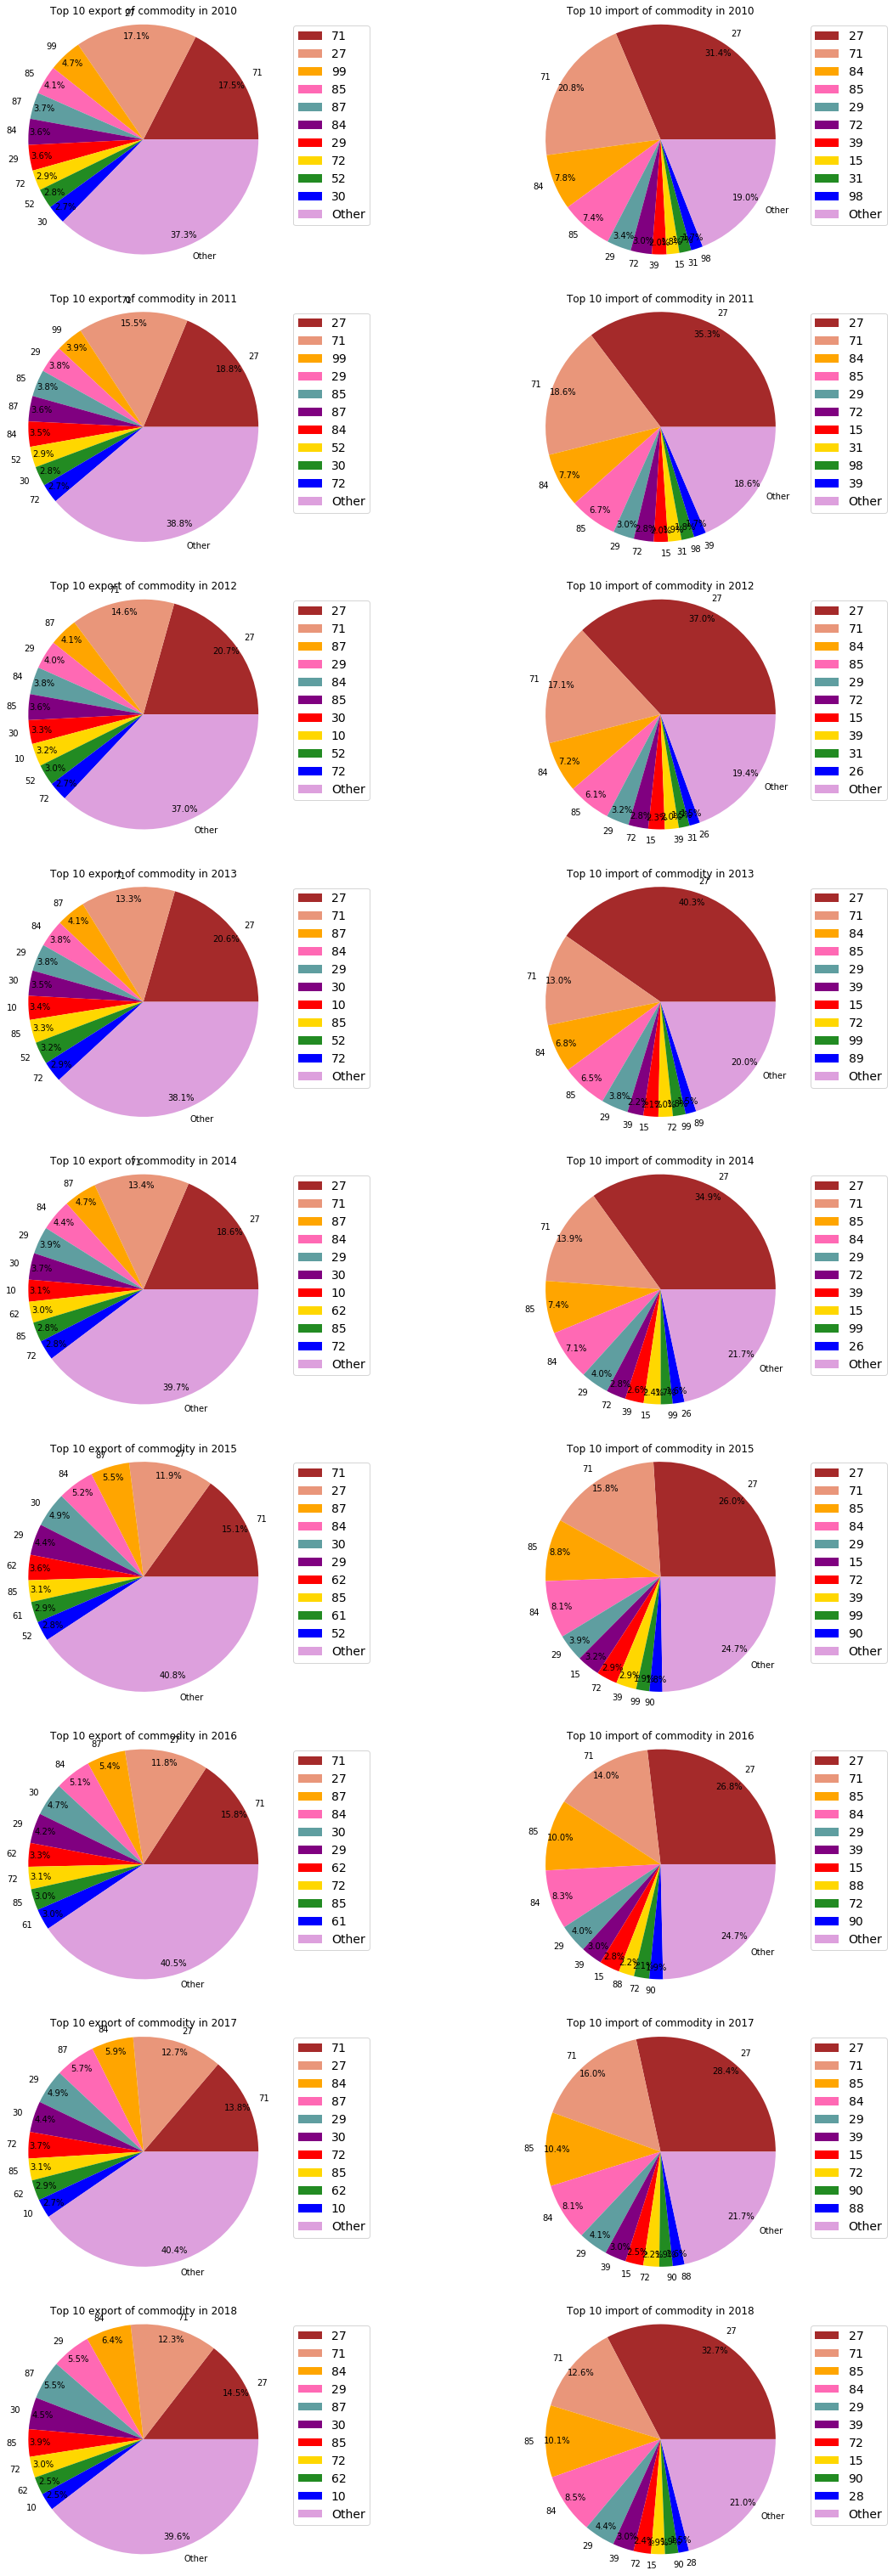

In [16]:
fig,ax=plt.subplots(9,2,figsize=(20,55))
for i in range(9):
    count=data_export[data_export.year==i+2010].groupby(['HSCode'])['value'].agg('sum').sort_values(ascending=False)
    groups=list(data_export[data_export.year==i+2010].groupby(['HSCode'])['value'].agg('sum').sort_values(ascending=False).index[:10])
    counts=list(count[:10])
    counts.append(count.agg(sum)-count[:10].agg('sum'))
    groups.append('Other')
    type_dict=pd.DataFrame({"group":groups,"counts":counts})
    clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
    type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[i,0])
    ax[i,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
    ax[i,0].set_title("Top 10 export of commodity in "+str(i+2010))
    ax[i,0].set_ylabel('')

    count=data_import[data_import.year==i+2010].groupby(['HSCode'])['value'].agg('sum').sort_values(ascending=False)
    groups=list(data_import[data_import.year==i+2010].groupby(['HSCode'])['value'].agg('sum').sort_values(ascending=False).index[:10])
    counts=list(count[:10])
    counts.append(count.agg(sum)-count[:10].agg('sum'))
    groups.append('Other')
    type_dict=pd.DataFrame({"group":groups,"counts":counts})
    clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
    qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[i,1])
    ax[i,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
    ax[i,1].set_title("Top 10 import of commodity in "+str(i+2010))
    ax[i,1].set_ylabel('')

<h3 id="24">2.4 Visualization for export/import by HSCode</h3>

According to line chart,we know that the export for HSCode 3,29,30,38,39,48,84,86 are increased by year,HSCode 13,99 are decreased by year.Moreover,the import for HSCode 8,15,27,44,45,48,2,54~71,84,85 are increased by year,HSCode 99 is decreased by year.


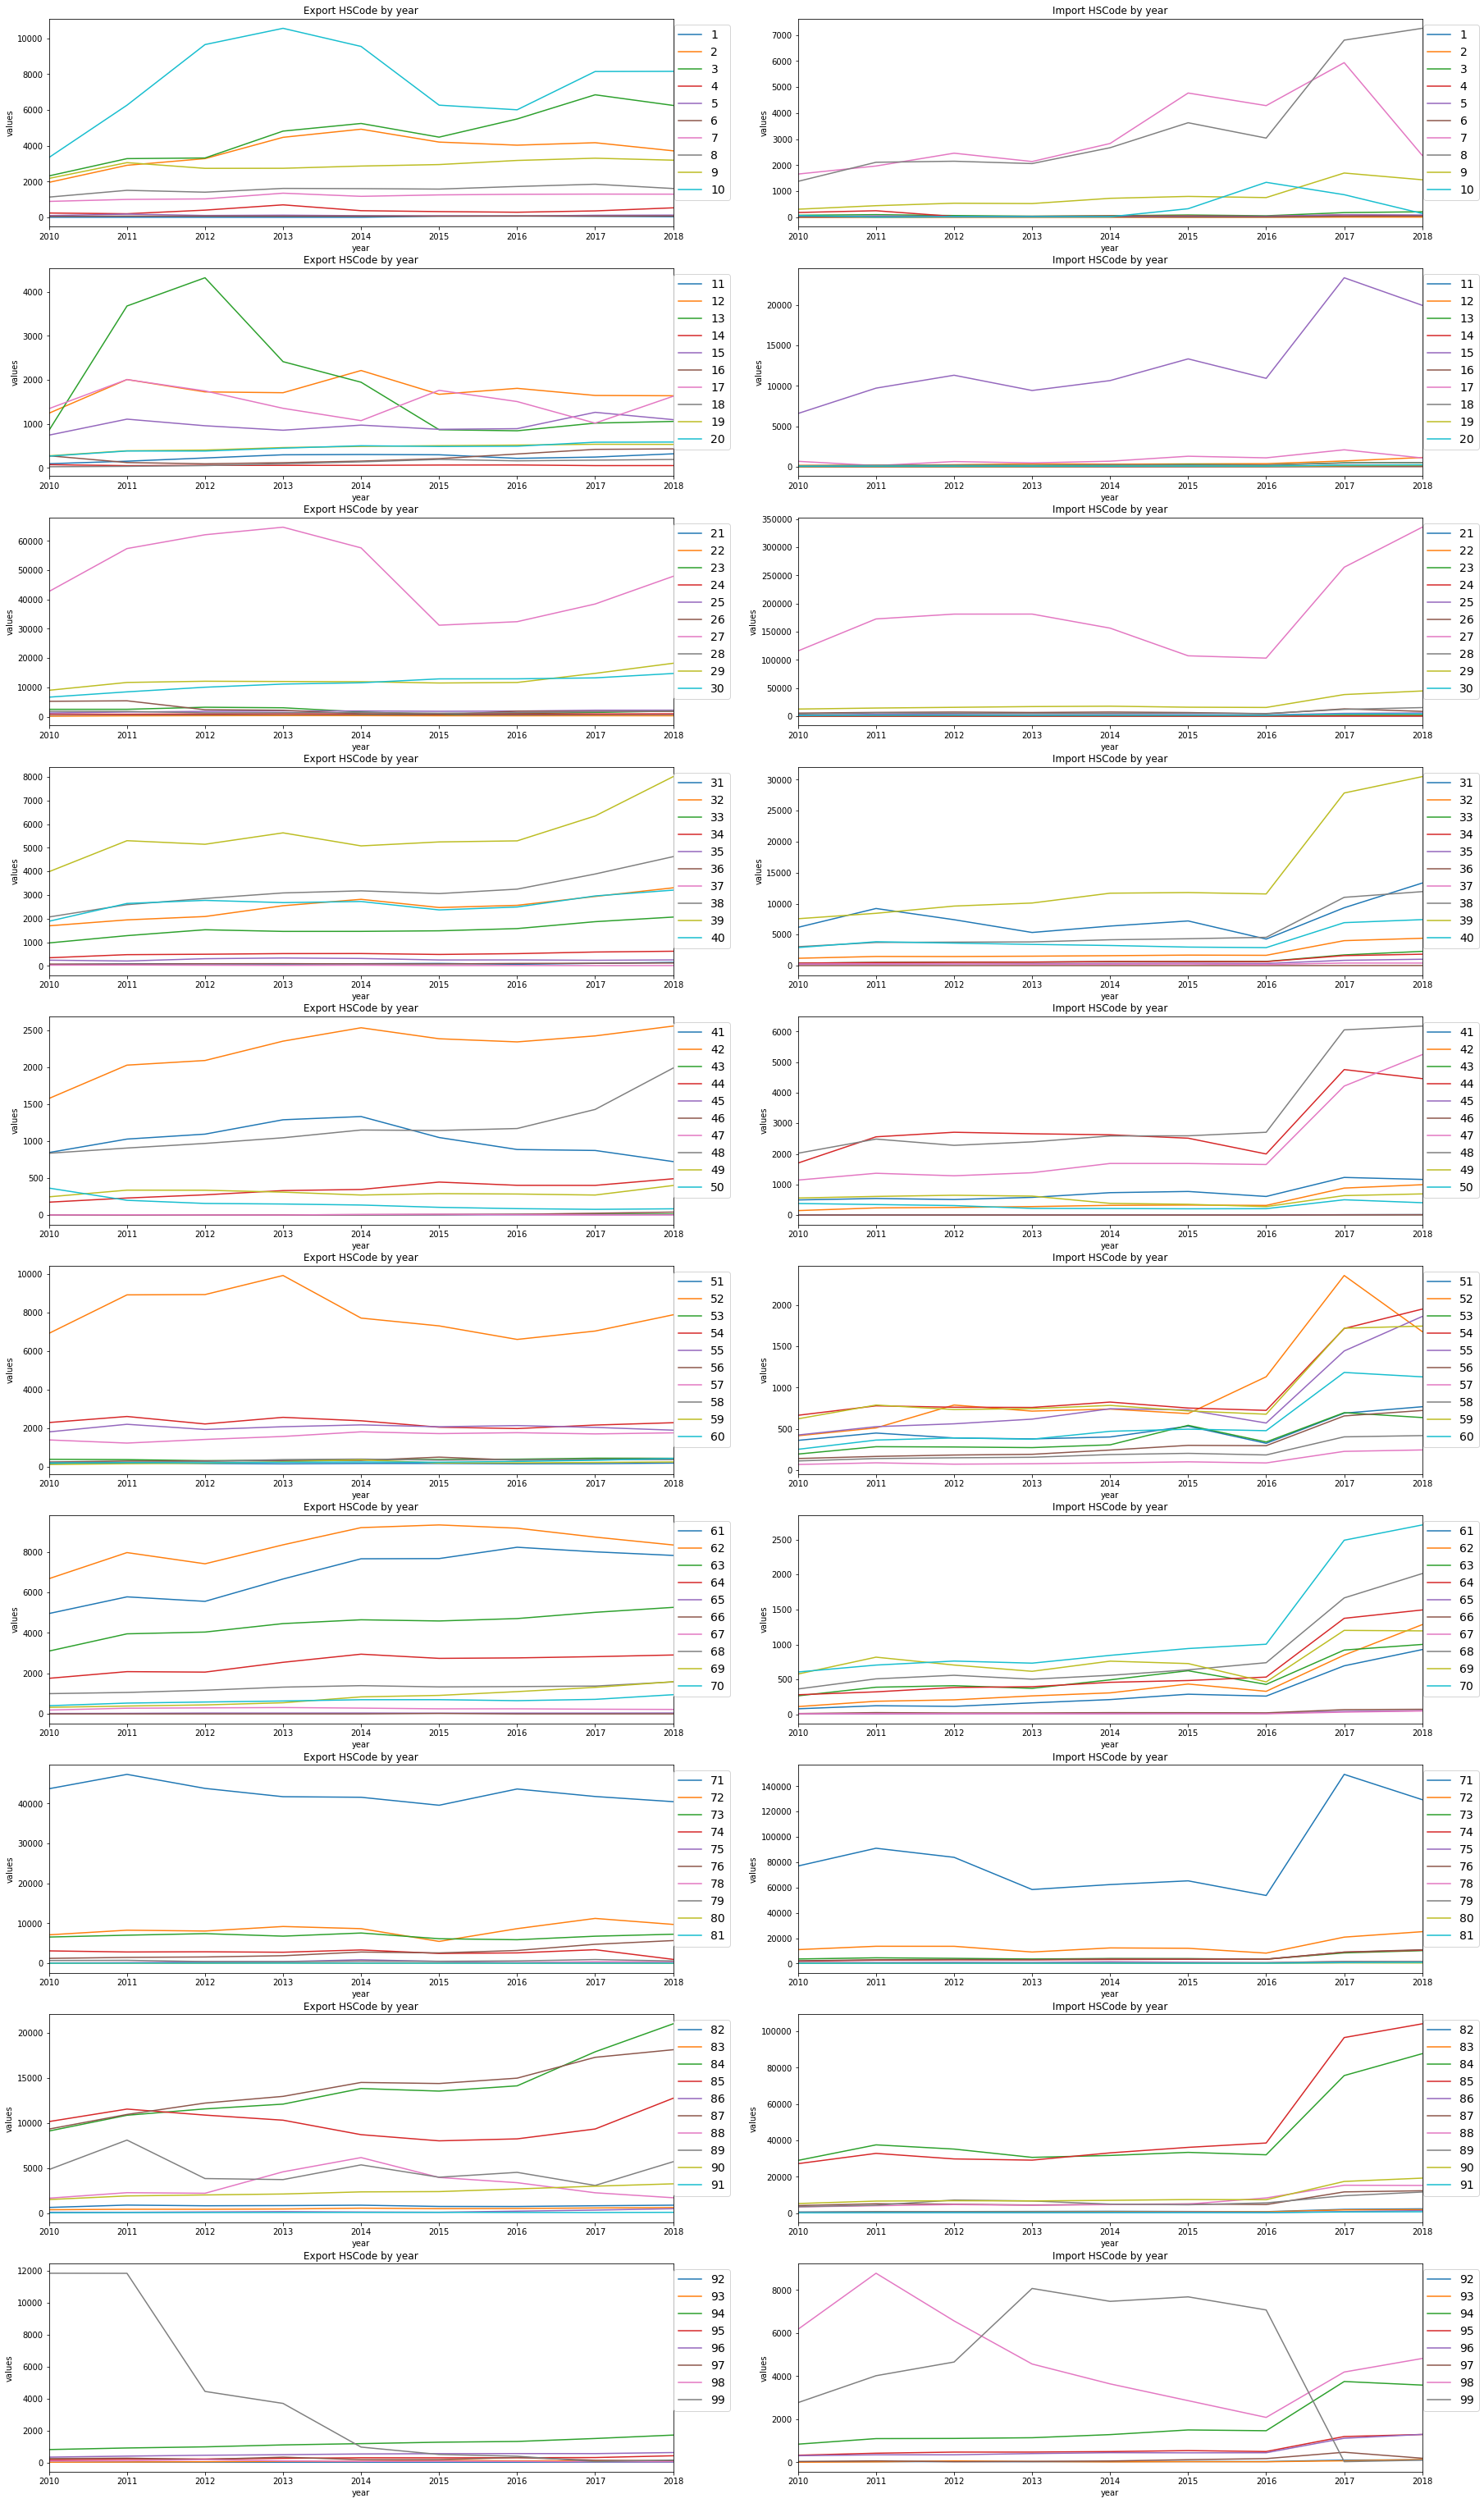

In [17]:
fig,ax=plt.subplots(10,2,figsize=(30,55))
for i in range(10):
    data_export.groupby(['HSCode','year'])['value'].agg(sum).unstack(['HSCode']).iloc[:,i*10:(i+1)*10].plot(ax=ax[i,0])
    ax[i,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
    ax[i,0].set_title("Export HSCode by year")
    ax[i,0].set_ylabel('values')

    data_import.groupby(['HSCode','year'])['value'].agg(sum).unstack(['HSCode']).iloc[:,i*10:(i+1)*10].plot(ax=ax[i,1])
    ax[i,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
    ax[i,1].set_title("Import HSCode by year")
    ax[i,1].set_ylabel('values')

# 3.Conclusion

1.From the graph of rank,we know that USA and China are very important country to export and import for India.

2.According to the pie chart,HSCode 27 and 71 are mainly import and exoprt commodity in India every year.

HSCode 27:MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.

HSCode 71:NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.

3.According to line chart,we know that the export for HSCode 3,29,30,38,39,48,84,86 are increased by year,HSCode 13,99 are decreased by year.Moreover,the import for HSCode 8,15,27,44,45,48,2,54~71,84,85 are increased by year,HSCode 99 is decreased by year.
